# Autoencoder

Esse notebook utiliza o arquivo autoencoder.py, para que o explorado aqui fique o mais simples possível.

In [4]:
from autoencoder import AutoencoderAux, Autoencoder

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../files/5G_attack_detection_ds.csv")
df = df.dropna()

X_train, y_train, X_test, y_test = AutoencoderAux.separate_datasets(df)
autoencoder = Autoencoder(X_train.shape[1])

## Treinamento em Não-Ataques

In [2]:
autoencoder.train_model(X_train)
reconstruction_error = autoencoder.predict_and_get_reconstruction_errors(X_test)

Epoch 1/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0945 - val_loss: 0.9994
Epoch 2/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0102 - val_loss: 0.9976
Epoch 3/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9949 - val_loss: 0.9966
Epoch 4/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0017 - val_loss: 0.9918
Epoch 5/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9847 - val_loss: 0.9604
Epoch 6/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9349 - val_loss: 0.8920
Epoch 7/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8930 - val_loss: 0.8830
Epoch 8/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8786 - val_loss: 0.8807
Epoch 9/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8903 - val_loss: 0.8801
Epoch 10/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8781 - val_loss: 0.8799
Epoch 11/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8849 - val_loss: 0.8797
Epoch 12/200
152/152 ━━━━━━━━━━━━━━━━━━━━

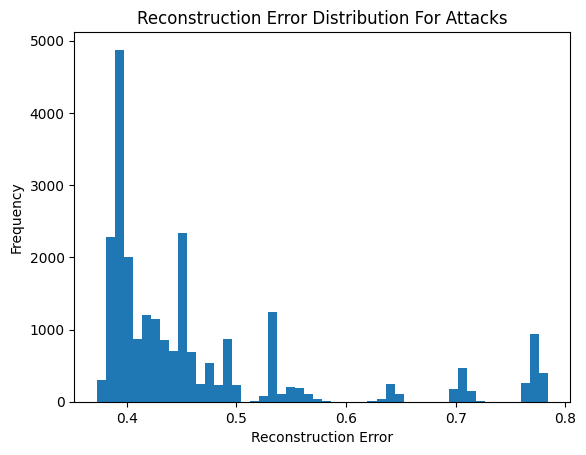

In [5]:
plt.hist(reconstruction_error, bins=50)
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution For Attacks')
plt.show()

In [7]:
X_train, y_train, X_test, y_test = AutoencoderAux.add_instances_to_testing(
    X_train, y_train, X_test, y_test
)

autoencoder.train_model(X_train)
reconstruction_error = autoencoder.predict_and_get_reconstruction_errors(X_test)

Epoch 1/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0922 - val_loss: 1.0003
Epoch 2/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0001 - val_loss: 0.9999
Epoch 3/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9968 - val_loss: 0.9998
Epoch 4/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9995 - val_loss: 0.9997
Epoch 5/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9988 - val_loss: 0.9995
Epoch 6/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0101 - val_loss: 0.9992
Epoch 7/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9959 - val_loss: 0.9979
Epoch 8/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9951 - val_loss: 0.9795
Epoch 9/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9675 - val_loss: 0.9168
Epoch 10/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9115 - val_loss: 0.8930
Epoch 11/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8914 - val_loss: 0.8872
Epoch 12/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8

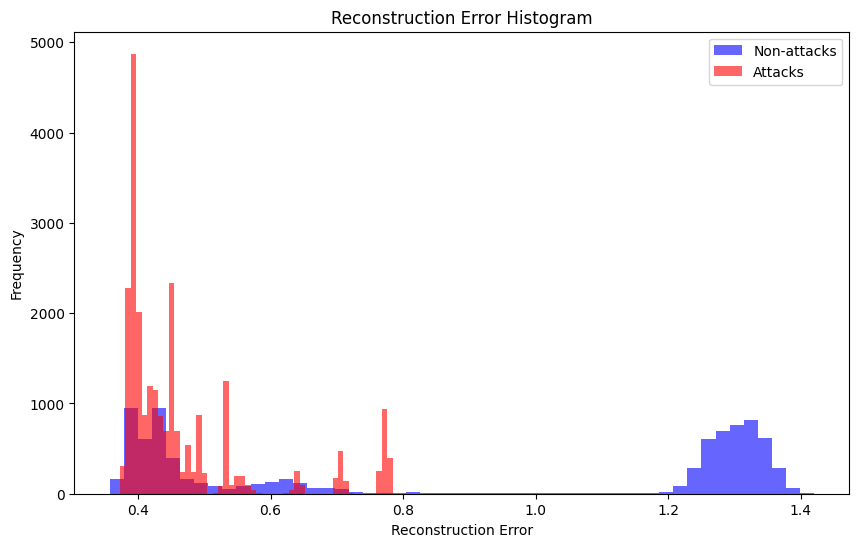

In [8]:
non_attack_errors = reconstruction_error[y_test == 1]
attack_errors = reconstruction_error[y_test == -1]

# Plot the histogram
plt.figure(figsize=(10, 6))

plt.hist(non_attack_errors, bins=50, alpha=0.6, color='blue', label='Non-attacks')
plt.hist(attack_errors, bins=50, alpha=0.6, color='red', label='Attacks')

plt.title('Reconstruction Error Histogram')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Treinamento em Ataques

Epoch 1/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5792 - val_loss: 0.4574
Epoch 2/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4590 - val_loss: 0.4572
Epoch 3/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4604 - val_loss: 0.4571
Epoch 4/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4593 - val_loss: 0.4571
Epoch 5/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4596 - val_loss: 0.4570
Epoch 6/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4601 - val_loss: 0.4570
Epoch 7/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4589 - val_loss: 0.4570
Epoch 8/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4598 - val_loss: 0.4569
Epoch 9/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4608 - val_loss: 0.4569
Epoch 10/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4595 - val_loss: 0.4569
Epoch 11/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4601 - val_loss: 0.4569
Epoch 12/200
152/152 ━━━━━━━━━━━━━━━━━━━━

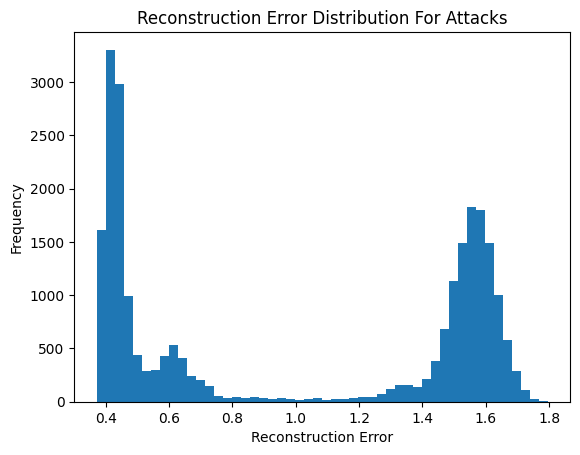

In [9]:
df = pd.read_csv("../files/5G_attack_detection_ds.csv")
df = df.dropna()

X_test, y_test, X_train, y_train = AutoencoderAux.separate_datasets(df)
autoencoder.train_model(X_train)
reconstruction_error = autoencoder.predict_and_get_reconstruction_errors(X_test)

plt.hist(reconstruction_error, bins=50)
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution For Non-Attacks')
plt.show()

Epoch 1/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5920 - val_loss: 0.4572
Epoch 2/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4590 - val_loss: 0.4570
Epoch 3/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4616 - val_loss: 0.4570
Epoch 4/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4593 - val_loss: 0.4569
Epoch 5/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4577 - val_loss: 0.4569
Epoch 6/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4601 - val_loss: 0.4568
Epoch 7/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4600 - val_loss: 0.4568
Epoch 8/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4604 - val_loss: 0.4568
Epoch 9/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4583 - val_loss: 0.4568
Epoch 10/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4599 - val_loss: 0.4568
Epoch 11/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4573 - val_loss: 0.4568
Epoch 12/200
121/121 ━━━━━━━━━━━━━━━━━━━━

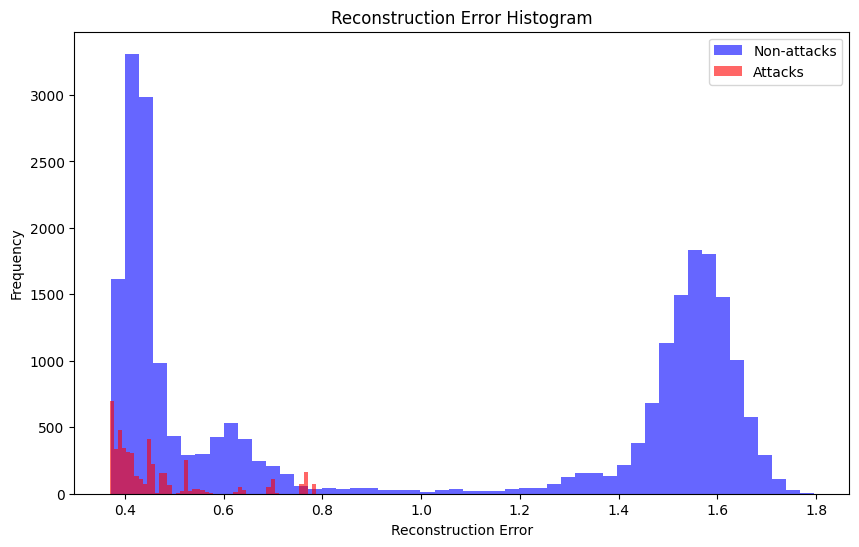

In [10]:
X_train, y_train, X_test, y_test = AutoencoderAux.add_instances_to_testing(
    X_train, y_train, X_test, y_test
)

autoencoder.train_model(X_train)
reconstruction_error = autoencoder.predict_and_get_reconstruction_errors(X_test)

non_attack_errors = reconstruction_error[y_test == 1]
attack_errors = reconstruction_error[y_test == -1]

# Plot the histogram
plt.figure(figsize=(10, 6))

plt.hist(non_attack_errors, bins=50, alpha=0.6, color='blue', label='Non-attacks')
plt.hist(attack_errors, bins=50, alpha=0.6, color='red', label='Attacks')

plt.title('Reconstruction Error Histogram')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()